# Loading Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.utils import resample
from sklearn.cluster import KMeans

In [31]:
import sys
ruta = r'D:\Programacion\Proyectos\Tools'
sys.path.append(ruta)
import mlt_class as mlt

# Loading Dataset

In [3]:
df = pd.read_csv('D:\Programacion\Datasets\online_food\onlinefoods.csv')

In [100]:
df

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_Size,Feedback,Clusters
0,20,Female,Single,Student,No Income,Post Graduate,4,Positive,1
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,Positive,1
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,Negative,2
3,22,Female,Single,Student,No Income,Graduate,6,Positive,0
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,Positive,1
...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,Positive,1
384,23,Female,Single,Student,No Income,Post Graduate,4,Positive,2
385,22,Female,Single,Student,No Income,Post Graduate,5,Positive,1
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,Positive,1


In [4]:
df.drop(['Unnamed: 12','Pin code','Output'],axis=1,inplace=True)

In [5]:
df.columns = ['_'.join(col.replace('_',' ').title().split()) if '_' in col else col.capitalize() for col in df.columns]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital_Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly_Income              388 non-null    object 
 5   Educational_Qualifications  388 non-null    object 
 6   Family_Size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Feedback                    388 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.4+ KB


# Cleaning Data

In [13]:
# Duplicates
df.duplicated().sum()

103

In [6]:
# Invalid Values
for col in df.select_dtypes('object'):
    print(df[col].value_counts(),end='\n\n')

Gender
Male      222
Female    166
Name: count, dtype: int64

Marital_Status
Single               268
Married              108
Prefer not to say     12
Name: count, dtype: int64

Occupation
Student           207
Employee          118
Self Employeed     54
House wife          9
Name: count, dtype: int64

Monthly_Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64

Educational_Qualifications
Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: count, dtype: int64

Feedback
Positive     317
Negative      71
Name: count, dtype: int64



In [36]:
print(f'Min and max age: {df.Age.min()} - {df.Age.max()}')
print(f'Min and max family size: {df.Family_Size.min()} - {df.Family_Size.max()}')

Min and max age: 18 - 33
Min and max family size: 1 - 6


In [37]:
# Missing Values
df.isna().sum()

Age                           0
Gender                        0
Marital_Status                0
Occupation                    0
Monthly_Income                0
Educational_Qualifications    0
Family_Size                   0
latitude                      0
longitude                     0
Feedback                      0
dtype: int64

# EDA

In [5]:
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Boxplot de la Edad')

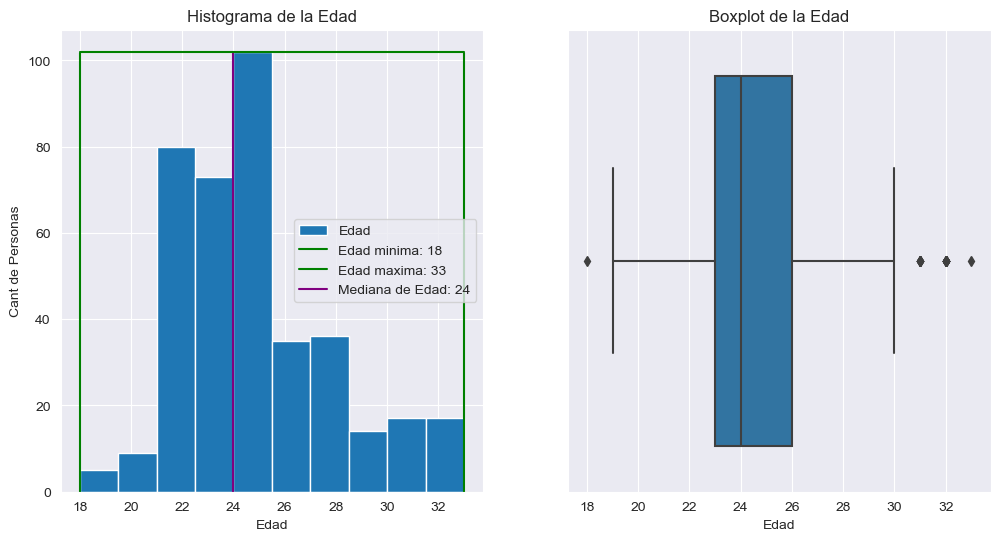

In [37]:
min_age,max_age,median_age = df.Age.min(),df.Age.max(),df.Age.median()

fig,ax = plt.subplots(1,2,figsize=(12,6))
df.Age.plot.hist(ax=ax[0],label='Edad')
ax[0].set_xlabel('Edad')
ax[0].set_ylabel('Cant de Personas')
ax[0].set_title('Histograma de la Edad')
ax[0].axvline(x=min_age,label=f'Edad minima: {min_age}',color='green',ymax=0.95)
ax[0].axvline(x=max_age,label=f'Edad maxima: {max_age}',color='green',ymax=0.95)
ax[0].axvline(x=median_age,label=f'Mediana de Edad: {int(median_age)}',color='purple',ymax=0.95)
ax[0].axhline(y=102,color='g',xmin=0.045,xmax=0.955)
ax[0].legend()

sns.boxplot(x=df.Age,ax=ax[1])
ax[1].set_xlabel('Edad')
ax[1].set_title('Boxplot de la Edad')

In [96]:
medianas = np.array([resample(df.Age).median() for x in range(10)])

(array([9., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([24. , 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25. ]),
 <BarContainer object of 10 artists>)

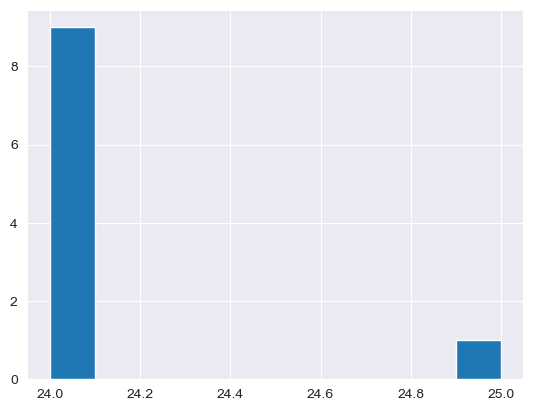

In [97]:
plt.hist(medianas)

Text(0.5, 0.98, 'Algunas relaciones de la Edad')

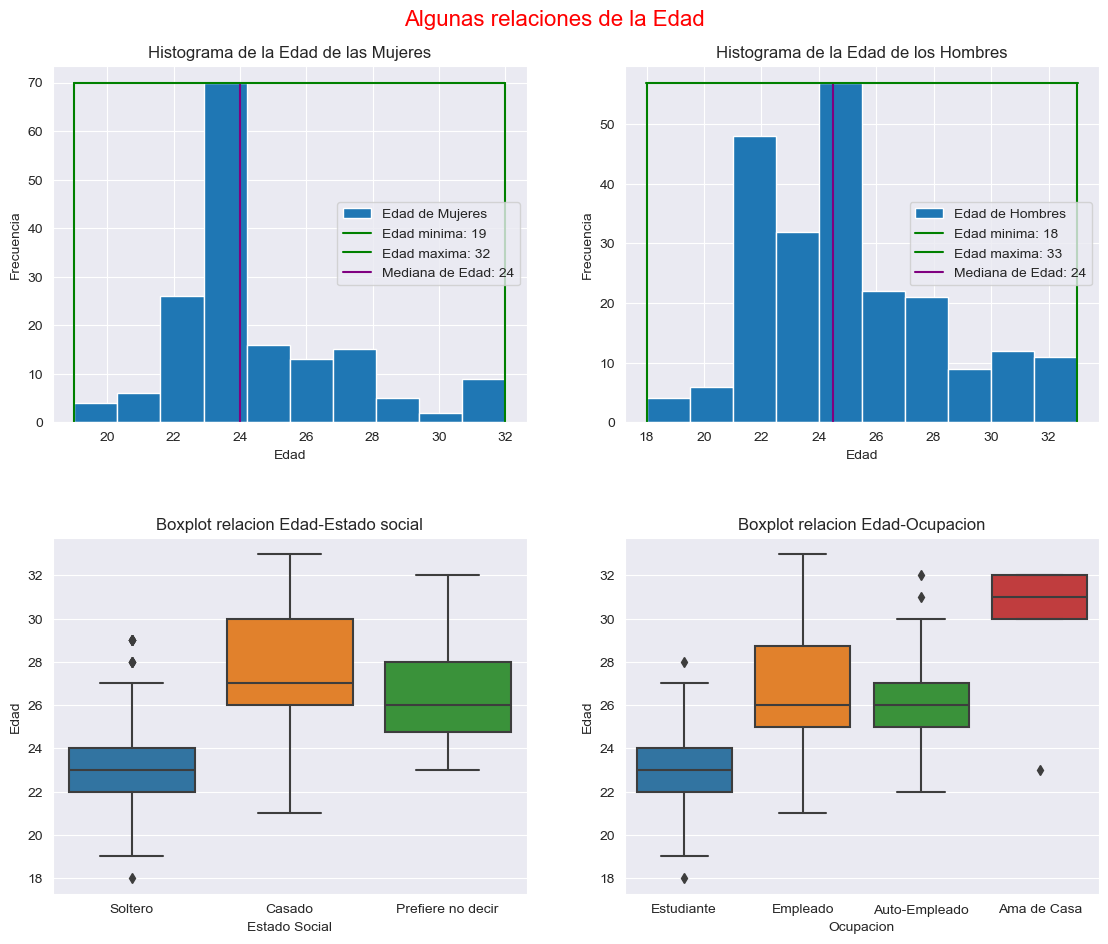

In [79]:
fig0,ax0 = plt.subplots(2,2,figsize=(12,10))

female = df.loc[df.Gender=='Female','Age']
female.plot.hist(ax=ax0[0,0],label='Edad de Mujeres')
ax0[0,0].set_xlabel('Edad')
ax0[0,0].set_ylabel('Frecuencia')
ax0[0,0].set_title('Histograma de la Edad de las Mujeres')
ax0[0,0].axvline(x=female.min(),label=f'Edad minima: {female.min()}',color='green',ymax=0.95)
ax0[0,0].axvline(x=female.max(),label=f'Edad maxima: {female.max()}',color='green',ymax=0.95)
ax0[0,0].axvline(x=female.median(),label=f'Mediana de Edad: {int(female.median())}',color='purple',ymax=0.95)
ax0[0,0].axhline(y=70,color='g',xmin=0.045,xmax=0.955)
ax0[0,0].legend()

male = df.loc[df.Gender=='Male','Age']
male.plot.hist(ax=ax0[0,1],label='Edad de Hombres')
ax0[0,1].set_xlabel('Edad')
ax0[0,1].set_ylabel('Frecuencia')
ax0[0,1].set_title('Histograma de la Edad de los Hombres')
ax0[0,1].axvline(x=male.min(),label=f'Edad minima: {male.min()}',color='green',ymax=0.95)
ax0[0,1].axvline(x=male.max(),label=f'Edad maxima: {male.max()}',color='green',ymax=0.95)
ax0[0,1].axvline(x=male.median(),label=f'Mediana de Edad: {int(male.median())}',color='purple',ymax=0.95)
ax0[0,1].axhline(y=57,color='g',xmin=0.045,xmax=0.955)
ax0[0,1].legend()

sns.boxplot(x=df.Marital_Status,y=df.Age,ax=ax0[1,0])
ax0[1,0].set_xlabel('Estado Social')
ax0[1,0].set_ylabel('Edad')
ax0[1,0].set_title('Boxplot relacion Edad-Estado social')
ax0[1,0].set_xticks([0,1,2],['Soltero','Casado','Prefiere no decir'])

sns.boxplot(x=df.Occupation,y=df.Age,ax=ax0[1,1])
ax0[1,1].set_xlabel('Ocupacion')
ax0[1,1].set_ylabel('Edad')
ax0[1,1].set_title('Boxplot relacion Edad-Ocupacion')
ax0[1,1].set_xticks([0,1,2,3],['Estudiante','Empleado','Auto-Empleado','Ama de Casa'])

plt.tight_layout(pad=4)
fig0.suptitle('Algunas relaciones de la Edad',color='r',size=16)

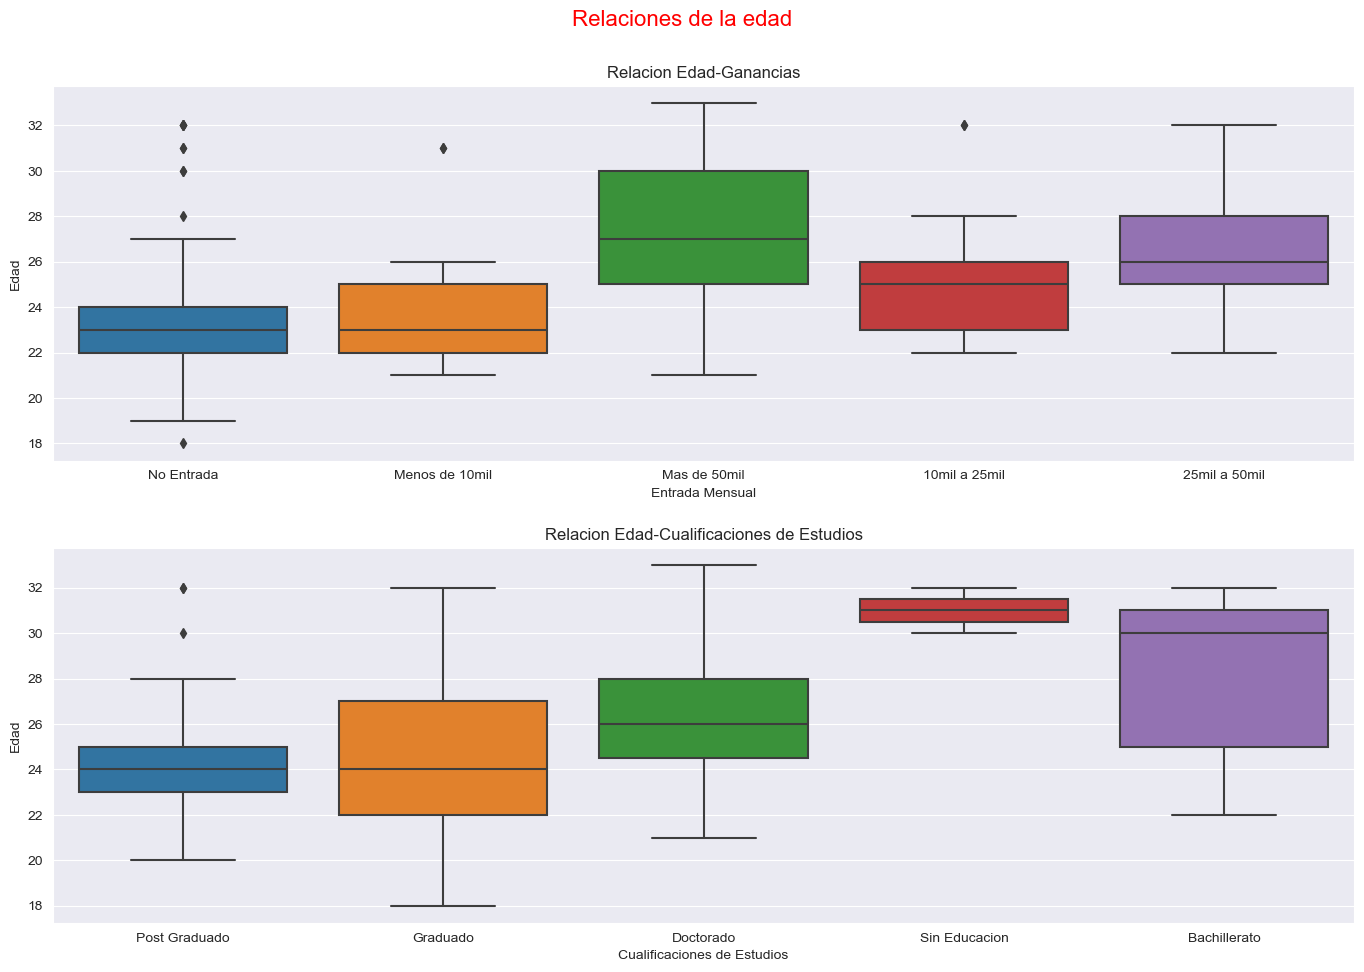

In [45]:
fig1, ax1 = plt.subplots(2,1,figsize=(14,10))

sns.boxplot(x=df.Monthly_Income,y=df.Age,ax=ax1[0])
ax1[0].set_title('Relacion Edad-Ganancias')
ax1[0].set_xlabel('Entrada Mensual')
ax1[0].set_ylabel('Edad')
ax1[0].set_xticks([0,1,2,3,4],['No Entrada','Menos de 10mil','Mas de 50mil','10mil a 25mil','25mil a 50mil'])

sns.boxplot(x=df.Educational_Qualifications,y=df.Age,ax=ax1[1])
ax1[1].set_title('Relacion Edad-Cualificaciones de Estudios')
ax1[1].set_xlabel('Cualificaciones de Estudios')
ax1[1].set_ylabel('Edad')
ax1[1].set_xticks([0,1,2,3,4],['Post Graduado','Graduado','Doctorado','Sin Educacion','Bachillerato'])

fig1.suptitle('Relaciones de la edad',size=16,color='r')
plt.tight_layout(pad=2)

In [23]:
print(f'Mediana de edad de los feedback positivos: {df.loc[df.Feedback=="Positive","Age"].median()}')

Mediana de edad de los feedback positivos: 24.0


In [28]:
print(f'Mediana de edad de los feedback negativos: {df.loc[~(df.Feedback=="Positive"),"Age"].median()}')

Mediana de edad de los feedback negativos: 26.0


Text(0.5, 0.98, 'Relaciones de Genero')

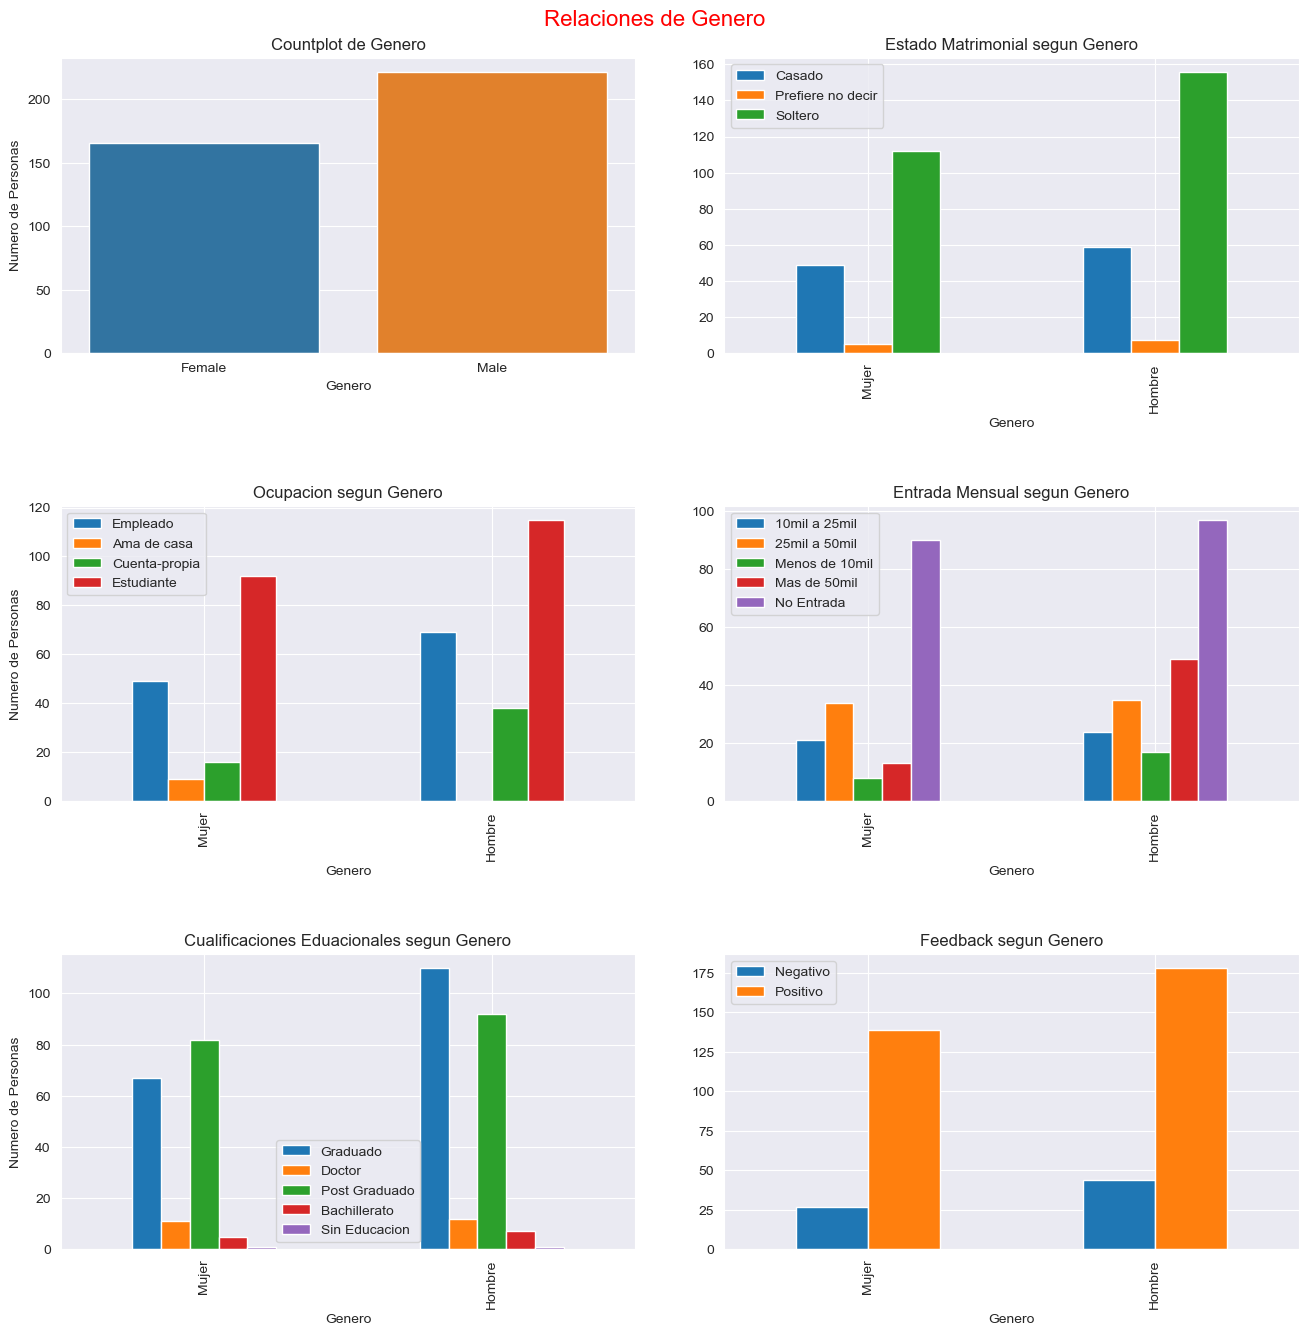

In [46]:
fig2,ax2 = plt.subplots(3,2,figsize=(14,14))

sns.countplot(x=df.Gender,ax=ax2[0,0])
ax2[0,0].set_title('Countplot de Genero')
ax2[0,0].set_xlabel('Genero')
ax2[0,0].set_ylabel('Numero de Personas')

df.groupby('Gender')['Marital_Status'].value_counts().unstack(fill_value=0).plot.bar(ax=ax2[0,1])
ax2[0,1].set_title('Estado Matrimonial segun Genero')
ax2[0,1].set_xlabel('Genero')
ax2[0,1].set_xticks([0,1],['Mujer','Hombre'])
ax2[0,1].legend(['Casado','Prefiere no decir','Soltero'])

df.groupby('Gender')['Occupation'].value_counts().unstack(fill_value=0).plot.bar(ax=ax2[1,0])
ax2[1,0].set_title('Ocupacion segun Genero')
ax2[1,0].set_xlabel('Genero')
ax2[1,0].set_ylabel('Numero de Personas')
ax2[1,0].set_xticks([0,1],['Mujer','Hombre'])
ax2[1,0].legend(['Empleado','Ama de casa','Cuenta-propia','Estudiante'])

df.groupby('Gender')['Monthly_Income'].value_counts().unstack(fill_value=0).plot.bar(ax=ax2[1,1])
ax2[1,1].set_title('Entrada Mensual segun Genero')
ax2[1,1].set_xlabel('Genero')
#ax2[1,1].set_ylabel('Numero de Personas')
ax2[1,1].set_xticks([0,1],['Mujer','Hombre'])
ax2[1,1].legend(['10mil a 25mil','25mil a 50mil','Menos de 10mil','Mas de 50mil','No Entrada'])
df.groupby('Gender')['Educational_Qualifications'].value_counts().unstack(fill_value=0).plot.bar(ax=ax2[2,0])
ax2[2,0].set_title('Cualificaciones Eduacionales segun Genero')
ax2[2,0].set_xlabel('Genero')
ax2[2,0].set_ylabel('Numero de Personas')
ax2[2,0].set_xticks([0,1],['Mujer','Hombre'])
ax2[2,0].legend(['Graduado','Doctor','Post Graduado','Bachillerato','Sin Educacion'])

df.groupby('Gender')['Feedback'].value_counts().unstack(fill_value=0).plot.bar(ax=ax2[2,1])
ax2[2,1].set_title('Feedback segun Genero')
ax2[2,1].set_xlabel('Genero')
#ax2[2,0].set_ylabel('Numero de Personas')
ax2[2,1].set_xticks([0,1],['Mujer','Hombre'])
ax2[2,1].legend(['Negativo','Positivo'])

plt.tight_layout(pad=4)
fig2.suptitle('Relaciones de Genero',size=16,color='r')

Text(0.5, 0.98, 'Relaciones del Estado Matrimonial')

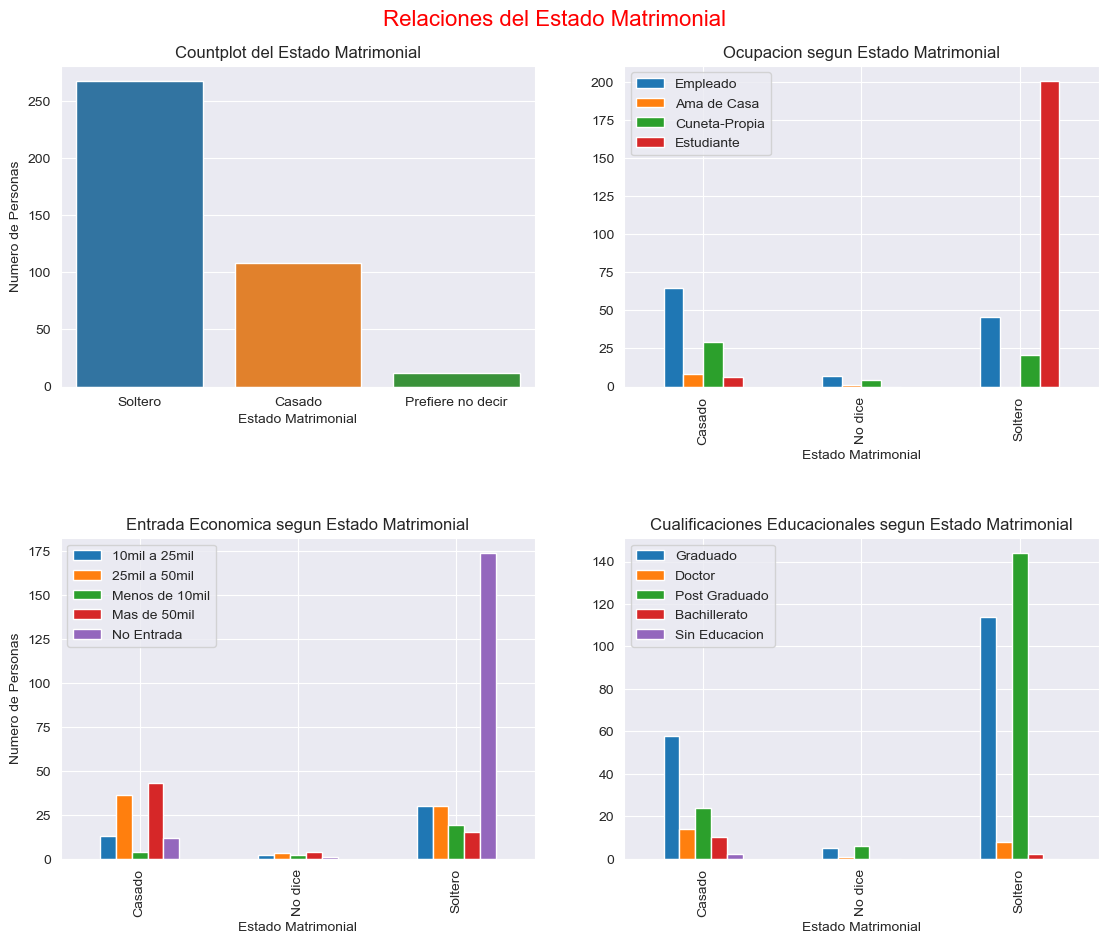

In [47]:
fig3,ax3 = plt.subplots(2,2,figsize=(12,10))

sns.countplot(x=df.Marital_Status,ax=ax3[0,0])
ax3[0,0].set_title('Countplot del Estado Matrimonial')
ax3[0,0].set_xlabel('Estado Matrimonial')
ax3[0,0].set_ylabel('Numero de Personas')
ax3[0,0].set_xticks([0,1,2],['Soltero','Casado','Prefiere no decir'])

df.groupby('Marital_Status')['Occupation'].value_counts().unstack(fill_value=0).plot.bar(ax=ax3[0,1])
ax3[0,1].set_title('Ocupacion segun Estado Matrimonial')
ax3[0,1].set_xlabel('Estado Matrimonial')
ax3[0,1].set_xticks([0,1,2],['Casado','No dice','Soltero'])
ax3[0,1].legend(['Empleado','Ama de Casa','Cuneta-Propia','Estudiante'])

df.groupby('Marital_Status')['Monthly_Income'].value_counts().unstack(fill_value=0).plot.bar(ax=ax3[1,0])
ax3[1,0].set_title('Entrada Economica segun Estado Matrimonial')
ax3[1,0].set_xlabel('Estado Matrimonial')
ax3[1,0].set_ylabel('Numero de Personas')
ax3[1,0].set_xticks([0,1,2],['Casado','No dice','Soltero'])
ax3[1,0].legend(['10mil a 25mil','25mil a 50mil','Menos de 10mil','Mas de 50mil','No Entrada'])


df.groupby('Marital_Status')['Educational_Qualifications'].value_counts().unstack(fill_value=0).plot.bar(ax=ax3[1,1])
ax3[1,1].set_title('Cualificaciones Educacionales segun Estado Matrimonial')
ax3[1,1].set_xlabel('Estado Matrimonial')
ax3[1,1].set_xticks([0,1,2],['Casado','No dice','Soltero'])
ax3[1,1].legend(['Graduado','Doctor','Post Graduado','Bachillerato','Sin Educacion'])

plt.tight_layout(pad=4)
fig3.suptitle('Relaciones del Estado Matrimonial',size=16,color='r')

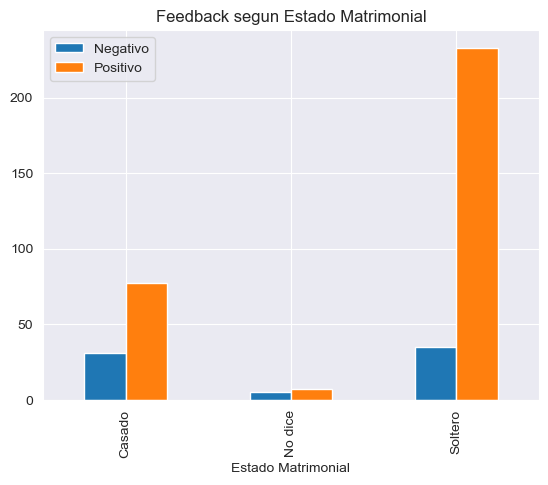

In [110]:
df.groupby('Marital_Status')['Feedback'].value_counts().unstack(fill_value=0).plot.bar()
plt.title('Feedback segun Estado Matrimonial')
plt.xlabel('Estado Matrimonial')
plt.xticks([0,1,2],['Casado','No dice','Soltero'])
plt.legend(['Negativo','Positivo'])

Text(0.5, 0.98, 'Relaciones de Trabajo')

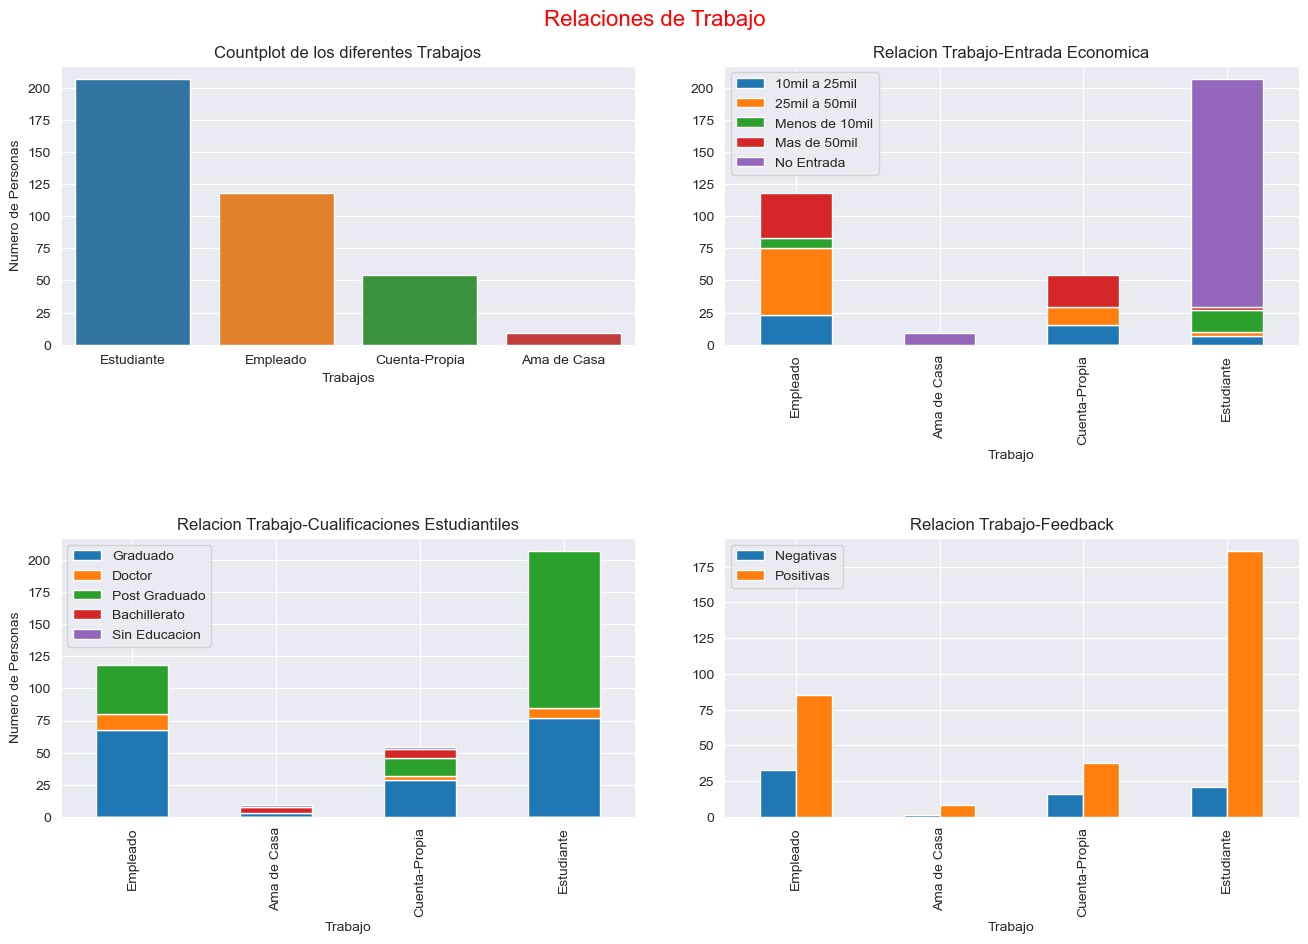

In [48]:
fig4, ax4 = plt.subplots(2,2,figsize=(14,10))

sns.countplot(x=df.Occupation,ax=ax4[0,0])
ax4[0,0].set_title('Countplot de los diferentes Trabajos')
ax4[0,0].set_xlabel('Trabajos')
ax4[0,0].set_ylabel('Numero de Personas')
ax4[0,0].set_xticks([0,1,2,3],['Estudiante','Empleado','Cuenta-Propia','Ama de Casa'])

df.groupby('Occupation')['Monthly_Income'].value_counts().unstack(fill_value=0).plot.bar(stacked=True,ax=ax4[0,1])
ax4[0,1].set_title('Relacion Trabajo-Entrada Economica')
ax4[0,1].set_xlabel('Trabajo')
ax4[0,1].set_xticks([0,1,2,3],['Empleado','Ama de Casa','Cuenta-Propia','Estudiante'])
ax4[0,1].legend(['10mil a 25mil','25mil a 50mil','Menos de 10mil','Mas de 50mil','No Entrada'])

df.groupby('Occupation')['Educational_Qualifications'].value_counts().unstack(fill_value=0).plot.bar(stacked=True,ax=ax4[1,0])
ax4[1,0].set_title('Relacion Trabajo-Cualificaciones Estudiantiles')
ax4[1,0].set_xlabel('Trabajo')
ax4[1,0].set_ylabel('Numero de Personas')
ax4[1,0].set_xticks([0,1,2,3],['Empleado','Ama de Casa','Cuenta-Propia','Estudiante'])
ax4[1,0].legend(['Graduado','Doctor','Post Graduado','Bachillerato','Sin Educacion'])

df.groupby('Occupation')['Feedback'].value_counts().unstack(fill_value=0).plot.bar(ax=ax4[1,1])
ax4[1,1].set_title('Relacion Trabajo-Feedback')
ax4[1,1].set_xlabel('Trabajo')
ax4[1,1].set_xticks([0,1,2,3],['Empleado','Ama de Casa','Cuenta-Propia','Estudiante'])
ax4[1,1].legend(['Negativas','Positivas'])


plt.tight_layout(pad=4)
fig4.suptitle('Relaciones de Trabajo',size=16,color='r')

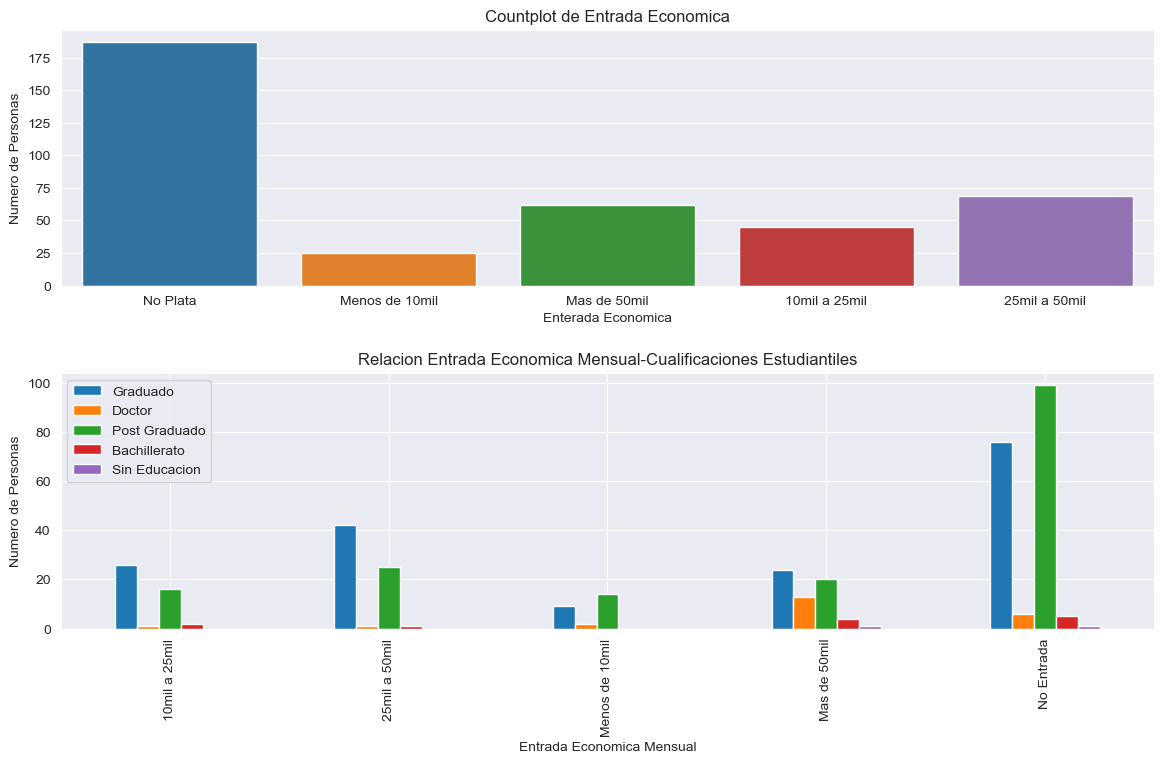

In [49]:
fig5,ax5 = plt.subplots(2,1,figsize=(12,8))

sns.countplot(x=df.Monthly_Income,ax=ax5[0])
ax5[0].set_title('Countplot de Entrada Economica')
ax5[0].set_xlabel('Enterada Economica')
ax5[0].set_ylabel('Numero de Personas')
ax5[0].set_xticks([0,1,2,3,4],['No Plata','Menos de 10mil','Mas de 50mil','10mil a 25mil','25mil a 50mil'])

df.groupby('Monthly_Income')['Educational_Qualifications'].value_counts().unstack(fill_value=0).plot.bar(ax=ax5[1])
ax5[1].set_title('Relacion Entrada Economica Mensual-Cualificaciones Estudiantiles')
ax5[1].set_xlabel('Entrada Economica Mensual')
ax5[1].set_ylabel('Numero de Personas')
ax5[1].set_xticks([0,1,2,3,4],['10mil a 25mil','25mil a 50mil','Menos de 10mil','Mas de 50mil','No Entrada'])
ax5[1].legend(['Graduado','Doctor','Post Graduado','Bachillerato','Sin Educacion'])

plt.tight_layout(pad=2)

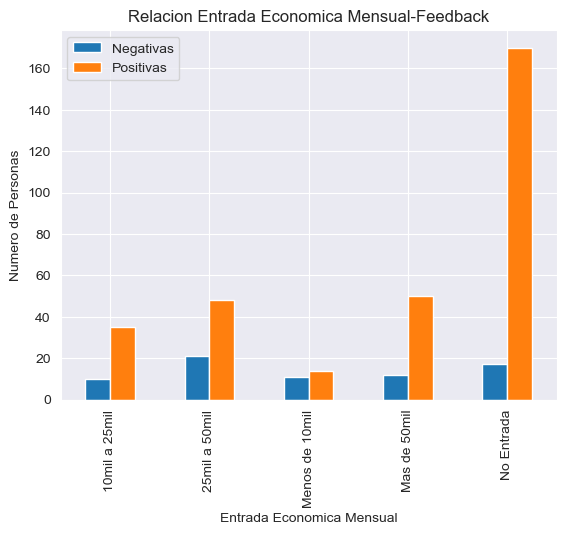

In [34]:
df.groupby('Monthly_Income')['Feedback'].value_counts().unstack(fill_value=0).plot.bar()
plt.title('Relacion Entrada Economica Mensual-Feedback')
plt.xlabel('Entrada Economica Mensual')
plt.ylabel('Numero de Personas')
plt.xticks([0,1,2,3,4],['10mil a 25mil','25mil a 50mil','Menos de 10mil','Mas de 50mil','No Entrada'])
plt.legend(['Negativas','Positivas'])


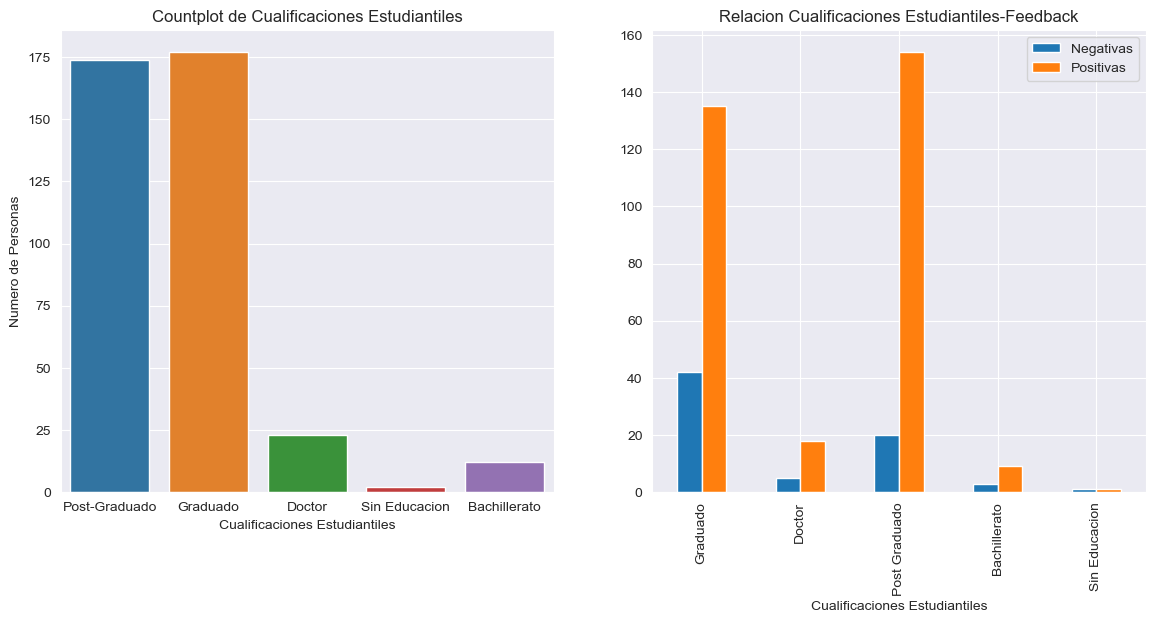

In [50]:
fig6,ax6 = plt.subplots(1,2,figsize=(14,6))

sns.countplot(x=df.Educational_Qualifications,ax=ax6[0])
ax6[0].set_title('Countplot de Cualificaciones Estudiantiles')
ax6[0].set_xlabel('Cualificaciones Estudiantiles')
ax6[0].set_ylabel('Numero de Personas')
ax6[0].set_xticks([0,1,2,3,4],['Post-Graduado','Graduado','Doctor','Sin Educacion','Bachillerato'])

df.groupby('Educational_Qualifications')['Feedback'].value_counts().unstack(fill_value=0).plot.bar(ax=ax6[1])
ax6[1].set_title('Relacion Cualificaciones Estudiantiles-Feedback')
ax6[1].set_xlabel('Cualificaciones Estudiantiles')
ax6[1].set_xticks([0,1,2,3,4],['Graduado','Doctor','Post Graduado','Bachillerato','Sin Educacion'])
ax6[1].legend(['Negativas','Positivas'])

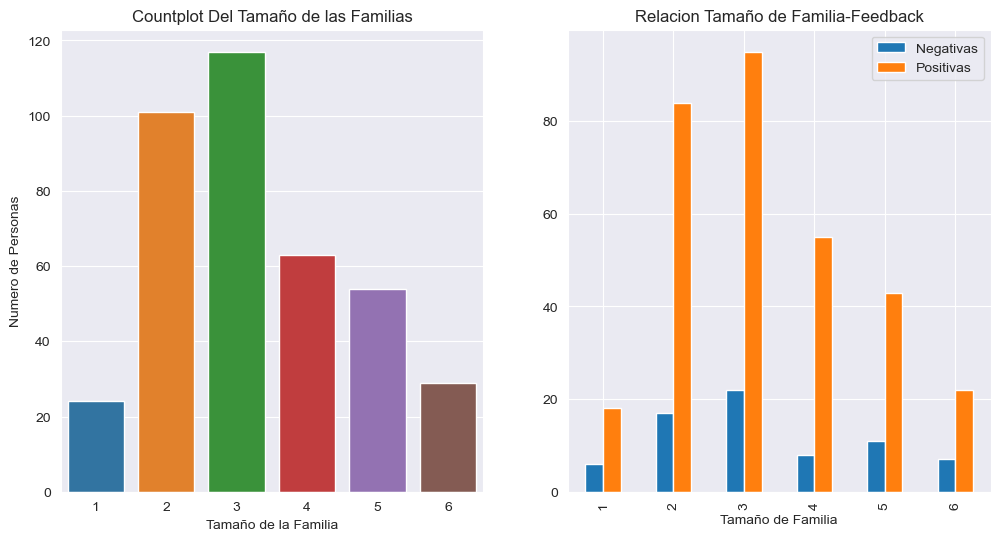

In [54]:
fig7,ax7 = plt.subplots(1,2,figsize=(12,6))

sns.countplot(x=df.Family_Size,ax=ax7[0])
ax7[0].set_title('Countplot Del Tamaño de las Familias')
ax7[0].set_xlabel('Tamaño de la Familia')
ax7[0].set_ylabel('Numero de Personas')

df.groupby('Family_Size')['Feedback'].value_counts().unstack(fill_value=0).plot.bar(ax=ax7[1])
ax7[1].set_title('Relacion Tamaño de Familia-Feedback')
ax7[1].set_xlabel('Tamaño de Familia')
ax7[1].legend(['Negativas','Positivas'])

Text(0.5, 0, 'Tamaño de la Familia')

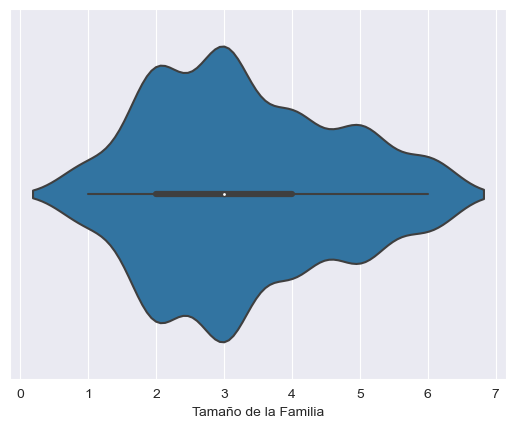

In [58]:
sns.violinplot(x=df.Family_Size)
plt.xlabel('Tamaño de la Familia')

([<matplotlib.axis.XTick at 0x13478a65850>,
 [Text(0, 0, 'Positivas'), Text(1, 0, 'Negativas')])

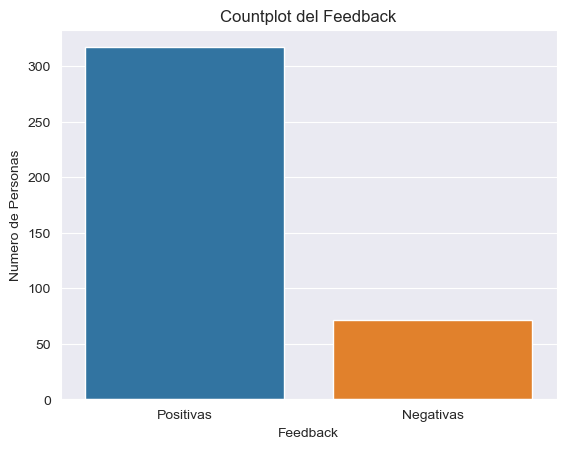

In [61]:
sns.countplot(x=df.Feedback)
plt.title('Countplot del Feedback')
plt.xlabel('Feedback')
plt.ylabel('Numero de Personas')
plt.xticks([0,1],['Positivas','Negativas'])

Text(0, 0.5, 'Latitud')

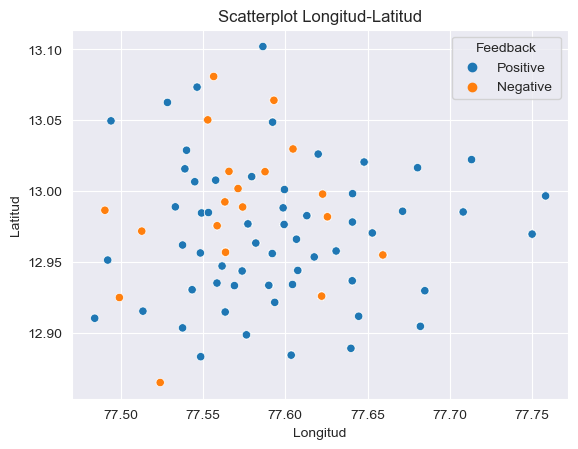

In [79]:
sns.scatterplot(x=df.Longitude, y= df.Latitude,hue=df.Feedback)
plt.title('Scatterplot Longitud-Latitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Featuring Engineering

In [6]:
km = KMeans(n_clusters=3,max_iter=100)
df['Clusters'] = km.fit_predict(df[['Longitude','Latitude']])

C:\Users\Mina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='Longitude', ylabel='Latitude'>

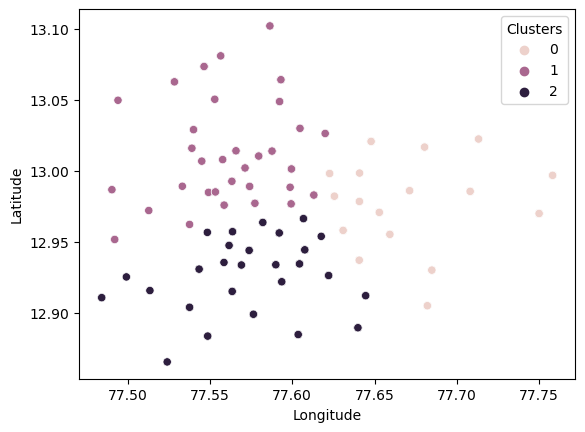

In [7]:
sns.scatterplot(x=df.Longitude, y= df.Latitude,hue=df.Clusters)

In [8]:
df.drop(['Longitude','Latitude'],axis=1,inplace=True)

In [9]:
df.Feedback.replace({'Positive':0,'Negative ':1},inplace=True)

In [10]:
correlation_matrix = df.select_dtypes('number').corr()
correlation_matrix

,Age,Family size,Feedback,Clusters
Age,1.000000,0.169982,0.198170,-0.069167
Family size,0.169982,1.000000,0.010148,-0.018391
Feedback,0.198170,0.010148,1.000000,-0.004108
Clusters,-0.069167,-0.018391,-0.004108,1.000000


<Axes: >

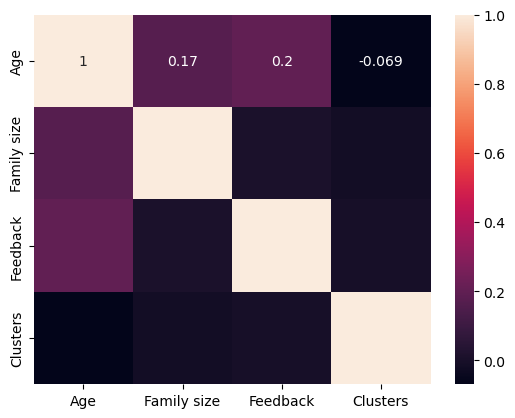

In [11]:
sns.heatmap(data=correlation_matrix,annot=True)

In [12]:
fdf = pd.concat([df.select_dtypes('number'),pd.get_dummies(df.select_dtypes('object'),dtype='int')],axis=1)

# ML

In [13]:
X = fdf.drop('Feedback',axis=1)
y = fdf.Feedback

In [49]:
model = mlt.XGBs(X,y)

In [50]:
model.xgbs('c',iter=100,scorer='roc_auc_score',avg='w')

100%|██████████| 100/100 [00:07<00:00, 13.17trial/s, best loss: -0.71875]          

Accuracy: 0.8333333333333334
Precision: 0.838095238095238
Recall: 0.8333333333333334
F1: 0.8355507285727216


In [51]:
model.xgbs('c',iter=100)

100%|██████████| 100/100 [00:07<00:00, 14.01trial/s, best loss: -0.5185185185185186]

Accuracy: 0.8589743589743589
Precision: 0.6363636363636364
Recall: 0.5
F1: 0.56


In [53]:
model_2 = mlt.Svms(X,y)

In [55]:
model_2.nsvms('c',iter=100)

100%|██████████| 100/100 [00:38<00:00,  2.61trial/s, best loss: -0.4615384615384615]

Accuracy: 0.7948717948717948
Precision: 0.42857142857142855
Recall: 0.42857142857142855
F1: 0.42857142857142855
